In [1]:
#Install mlxtend
!python -m pip install --upgrade mlxtend

In [2]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read the CSV file
df = pd.read_csv(r'C:\Users\Saemi\OneDrive\Education\WGU\D212 Data Mining II\PA\Dataset - Medical\medical_market_basket.csv')
# Show an example of a transaction in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Presc01  7501 non-null   object
 1   Presc02  5747 non-null   object
 2   Presc03  4389 non-null   object
 3   Presc04  3345 non-null   object
 4   Presc05  2529 non-null   object
 5   Presc06  1864 non-null   object
 6   Presc07  1369 non-null   object
 7   Presc08  981 non-null    object
 8   Presc09  654 non-null    object
 9   Presc10  395 non-null    object
 10  Presc11  256 non-null    object
 11  Presc12  154 non-null    object
 12  Presc13  87 non-null     object
 13  Presc14  47 non-null     object
 14  Presc15  25 non-null     object
 15  Presc16  8 non-null      object
 16  Presc17  4 non-null      object
 17  Presc18  4 non-null      object
 18  Presc19  3 non-null      object
 19  Presc20  1 non-null      object
dtypes: object(20)
memory usage: 2.3+ MB


In [4]:
#Remove rows no values
data = df[df['Presc01'].notna()]
data.shape

(7501, 20)

In [5]:
data.head(10)

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
3,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,enalapril,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,paroxetine,allopurinol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,abilify,atorvastatin,folic acid,naproxen,losartan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,cialis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,hydrochlorothiazide,glyburide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,metformin,salmeterol inhaler,sertraline HCI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,metoprolol,carvedilol,losartan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,glyburide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Example of a transaction
data.iloc[0]

Presc01                 amlodipine
Presc02          albuterol aerosol
Presc03                allopurinol
Presc04               pantoprazole
Presc05                  lorazepam
Presc06                 omeprazole
Presc07                 mometasone
Presc08                fluconozole
Presc09                 gabapentin
Presc10                pravastatin
Presc11                     cialis
Presc12                   losartan
Presc13    metoprolol succinate XL
Presc14           sulfamethoxazole
Presc15                    abilify
Presc16             spironolactone
Presc17              albuterol HFA
Presc18               levofloxacin
Presc19               promethazine
Presc20                  glipizide
Name: 1, dtype: object

In [7]:
#DataFrame converted to list of lists
rows = []
for i in range (0, 7501):
    rows.append([str(data.values[i,j])
                for j in range (0, 20)])

In [8]:
#List fed to TransactionEncoder
DE = TransactionEncoder()
array = DE.fit(rows).transform(rows)

#return array to DataFrame
transaction = pd.DataFrame(array, columns = DE.columns_)
transaction

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,...,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
#display items as column
for col in transaction.columns:
        print(col)

Duloxetine
Premarin
Yaz
abilify
acetaminophen
actonel
albuterol HFA
albuterol aerosol
alendronate
allopurinol
alprazolam
amitriptyline
amlodipine
amoxicillin
amphetamine
amphetamine salt combo
amphetamine salt combo xr
atenolol
atorvastatin
azithromycin
benazepril
benicar
boniva
bupropion sr
carisoprodol
carvedilol
cefdinir
celebrex
celecoxib
cephalexin
cialis
ciprofloxacin
citalopram
clavulanate K+
clonazepam
clonidine HCI
clopidogrel
clotrimazole
codeine
crestor
cyclobenzaprine
cymbalta
dextroamphetamine XR
diazepam
diclofenac sodium
doxycycline hyclate
enalapril
escitalopram
esomeprazole
ezetimibe
fenofibrate
fexofenadine
finasteride
flovent hfa 110mcg inhaler
fluconozole
fluoxetine HCI
fluticasone
fluticasone nasal spray
folic acid
furosemide
gabapentin
glimepiride
glipizide
glyburide
hydrochlorothiazide
hydrocodone
hydrocortisone 2.5% cream
ibuprophen
isosorbide mononitrate
lansoprazole
lantus
levofloxacin
levothyroxine sodium
lisinopril
lorazepam
losartan
lovastatin
meloxicam
met

In [10]:
#Remove NAN column from transformed dataset
cleaned_df = transaction.drop(['nan'], axis = 1)
cleaned_df

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,...,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
#Save the transformed dataset to csv
cleaned_df.to_csv('cleaned_dataset.csv', index = False)
cleaned_df.columns

Index(['Duloxetine', 'Premarin', 'Yaz', 'abilify', 'acetaminophen', 'actonel',
       'albuterol HFA', 'albuterol aerosol', 'alendronate', 'allopurinol',
       ...
       'trazodone HCI', 'triamcinolone Ace topical', 'triamterene',
       'trimethoprim DS', 'valaciclovir', 'valsartan', 'venlafaxine XR',
       'verapamil SR', 'viagra', 'zolpidem'],
      dtype='object', length=119)

In [12]:
# 5 most popular products in transformed dataset 
count = cleaned_df.loc[:,:].sum()
pop_item = count.sort_values(ascending=False).head(5)
pop_item = pop_item.to_frame()
pop_item = pop_item.reset_index()
pop_item = pop_item.rename(columns = {'index':'Products', 0:'Count'})

<Figure size 800x400 with 0 Axes>

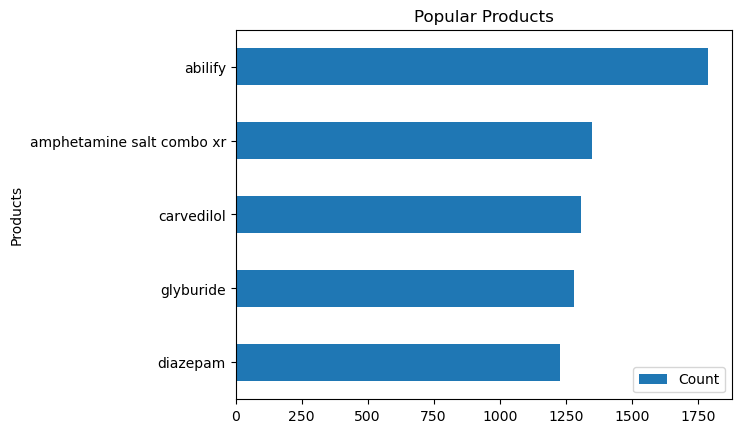

In [13]:
#Data visualization
plt.figure(figsize=(8,4))
ax = pop_item.plot.barh(x = 'Products', y = 'Count')
plt.title('Popular Products')
plt.gca().invert_yaxis()

In [14]:
#Create Apriori object
rules = apriori(cleaned_df, min_support = 0.02, use_colnames = True)
rules

,support,itemsets
0,0.046794,(Premarin)
1,0.238368,(abilify)
2,0.020397,(albuterol aerosol)
3,0.033329,(allopurinol)
4,0.079323,(alprazolam)
...,...,...
98,0.023064,"(lisinopril, diazepam)"
99,0.023464,"(diazepam, losartan)"
100,0.022930,"(metoprolol, diazepam)"
101,0.020131,"(glyburide, doxycycline hyclate)"


In [15]:
#Create the rules table
#threshold over 1 considered as strong rules
rule_table = association_rules(rules, metric = 'lift', min_threshold=1)
rule_table

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(abilify),(amlodipine),0.238368,0.071457,0.023597,0.098993,1.385352,0.006564,1.030562,0.365218
1,(amlodipine),(abilify),0.071457,0.238368,0.023597,0.330224,1.385352,0.006564,1.137144,0.299568
2,(abilify),(amphetamine salt combo),0.238368,0.068391,0.024397,0.102349,1.496530,0.008095,1.037830,0.435627
3,(amphetamine salt combo),(abilify),0.068391,0.238368,0.024397,0.356725,1.496530,0.008095,1.183991,0.356144
4,(abilify),(amphetamine salt combo xr),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
...,...,...,...,...,...,...,...,...,...,...
89,(diazepam),(metoprolol),0.163845,0.095321,0.022930,0.139951,1.468215,0.007312,1.051893,0.381390
90,(glyburide),(doxycycline hyclate),0.170911,0.095054,0.020131,0.117785,1.239135,0.003885,1.025766,0.232768
91,(doxycycline hyclate),(glyburide),0.095054,0.170911,0.020131,0.211781,1.239135,0.003885,1.051852,0.213256
92,(glyburide),(losartan),0.170911,0.132116,0.028530,0.166927,1.263488,0.005950,1.041786,0.251529


In [16]:
#Remove frozenset({}) in excel
rule_table["antecedents"] = rule_table["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
rule_table["consequents"] = rule_table["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

In [17]:
#Filter the rule_table for abilify
abilify_ant = rule_table[(rule_table['antecedents'] == 'abilify')]
abilify_cons = rule_table[(rule_table['consequents'] == 'abilify')]
abilify = pd.concat([abilify_ant, abilify_cons])
abilify

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,abilify,amlodipine,0.238368,0.071457,0.023597,0.098993,1.385352,0.006564,1.030562,0.365218
2,abilify,amphetamine salt combo,0.238368,0.068391,0.024397,0.102349,1.496530,0.008095,1.037830,0.435627
4,abilify,amphetamine salt combo xr,0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
6,abilify,atorvastatin,0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850,0.467950
8,abilify,carvedilol,0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
10,abilify,cialis,0.238368,0.076523,0.023997,0.100671,1.315565,0.005756,1.026851,0.314943
12,abilify,citalopram,0.238368,0.087188,0.024397,0.102349,1.173883,0.003614,1.016889,0.194486
14,abilify,clopidogrel,0.238368,0.059992,0.022797,0.095638,1.594172,0.008497,1.039415,0.489364
16,abilify,dextroamphetamine XR,0.238368,0.081056,0.027463,0.115213,1.421397,0.008142,1.038604,0.389252
18,abilify,diazepam,0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197


In [18]:
abilify.sort_values('confidence', ascending=False).head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,metformin,abilify,0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
25,glipizide,abilify,0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962,0.461536
29,lisinopril,abilify,0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369
